<a href="https://colab.research.google.com/github/toshimzt/AI-in-AG-conference-Workshop-4-15/blob/main/AI_in_Ag_Phenotyping_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to the Plant Phenotyping Workshop

* In this colab notebook, we will go through the modules in plant phenotyping pipeline.
* We will also have a look at the Interactive Graphical User Interface (GUI) that enables the Data Discovery in Plant Phenotyping

Check out our [Documentation](https://plant-analysis-avll.readthedocs.io/en/latest/) and [PyPI](https://test.pypi.org/project/plant-analysis-AVLL/) package

Install required dependencies. \
If there is a popup about restarting session, restart and run the below cell again.

In [ ]:
!pip install plantcv==3.14.2
!pip install gradio==4.18.0
!pip install ultralytics
!pip install -i https://test.pypi.org/simple/ plant-analysis-AVLL==0.0.10

  Using cached gradio-4.18.0-py3-none-any.whl.metadata (15 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached fastapi-0.115.0-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.4.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gradio_client-0.10.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 k

### Download data and model weights

Now, Upload the workshop_material.zip shared with you on to session. \
You can also download it from the [google drive link](https://drive.google.com/file/d/1CxIsrQMKU_0ot0N2xmOGDNvvHwp-rHgB/view?usp=sharing)

Unzip data and model weights

In [ ]:
!unzip workshop_material.zip

In [ ]:
import plant_analysis_AVLL
import matplotlib.pyplot as plt
import cv2
import numpy as np
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'greycomatrix' from 'skimage.feature' (/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py)

In the DATA Folder, there are six plant folders. Five cotton and one corn. Lets go through each module in the pipeline and visualize one of the plants.

In [ ]:
# make an object and update some variables
plant_analysis = plant_analysis_AVLL.Plant_Analysis()
plant_analysis.update_service_type(service=0)
plant_analysis.update_input_path(input_path = 'DATA')
plant_analysis.update_check_RI_option(True)
plant_analysis.update_check_CI_option(True)

In [ ]:
# Functions to visualize images and features
def display_images(images_with_descriptions, title, gray = False):

  rows = 3
  columns = 3
  fig = plt.figure(figsize=(10, 10))
  index = 1
  for image,description in images_with_descriptions[:9]:
    fig.add_subplot(rows, columns, index)
    index += 1
    cmap = 'gray' if gray else 'viridis'
    plt.imshow(image, cmap = cmap)
    plt.axis('off')
    plt.title(description)
  plt.suptitle(title)

def display_image(image, title, gray = False):

  cmap = 'gray' if gray else 'viridis'
  plt.imshow(image, cmap = cmap)
  plt.axis('off')
  plt.title(title)
  plt.show()

Lets check which plant folders are loaded into the pipeline

In [ ]:
plant_names = plant_analysis.get_plant_names()
print('Input plant folders to the pipeline are: ',plant_names)

#set plant name to one of the plants for visualization
plant_name = 'Cotton_1'

Input plant folders to the pipeline are:  ['Cotton_1', 'Cotton_2', 'Cotton_3']


## Module 1

First, lets check what the input images are

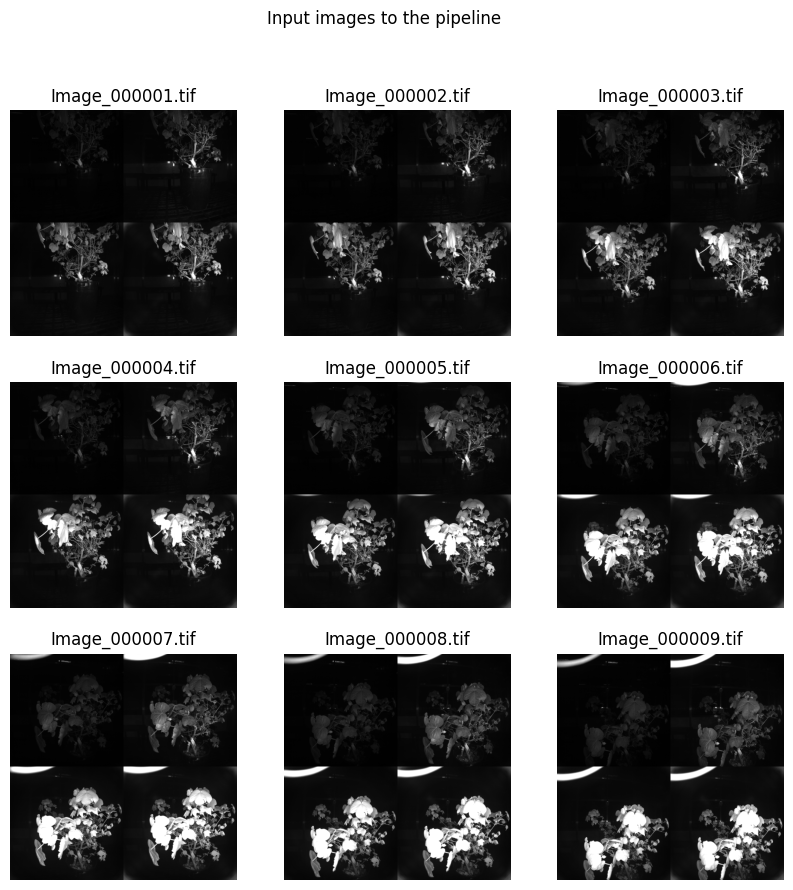

In [ ]:
title = 'Input images to the pipeline'
images_with_descriptions = plant_analysis.get_raw_images(plant_name)
display_images(images_with_descriptions, title, gray = True)

## Module 2A

Get color images from the input images

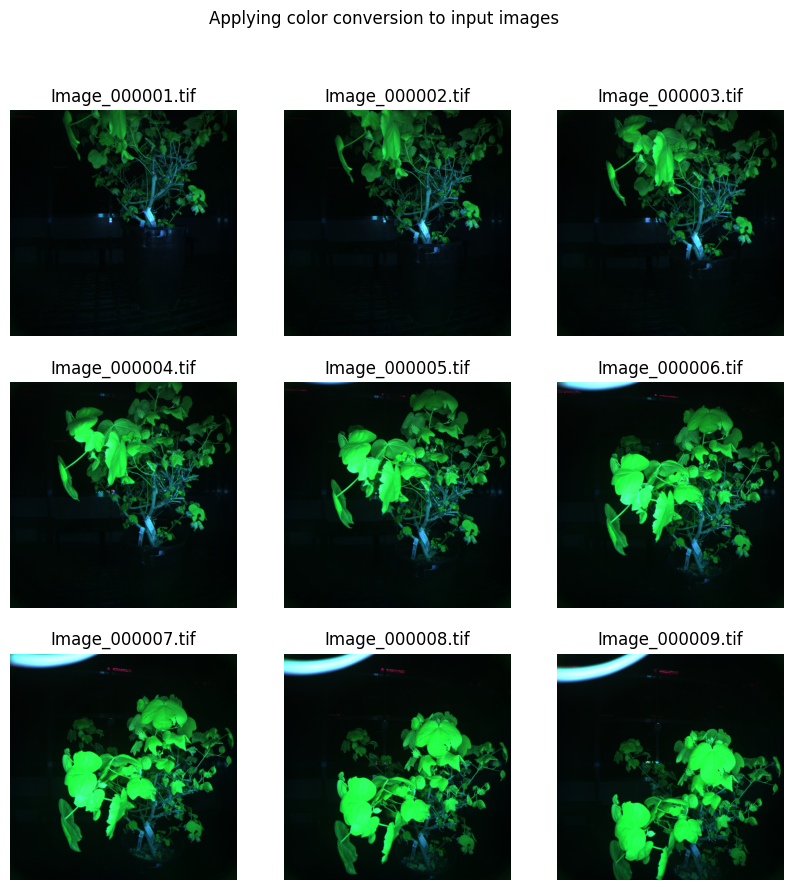

In [ ]:
plant_analysis.make_color_images()
title = 'Applying color conversion to input images'
images_with_descriptions = plant_analysis.get_color_images(plant_name)
display_images(images_with_descriptions, title, gray = False)

Stitching the color images to get one whole image of the plant

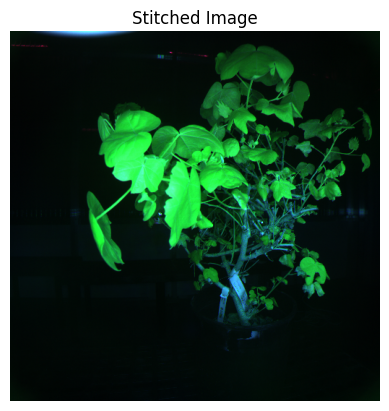

In [ ]:
plant_analysis.stitch_color_images()
title = 'Stitched Image'
image, description = plant_analysis.plants[plant_name]['stitched_image']
display_image(image, title, gray = False)

Connected Component Analysis to remove background

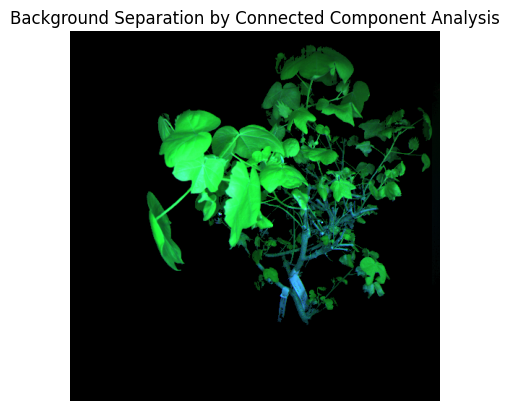

In [ ]:
plant_analysis.calculate_connected_components()
title = 'Background Separation by Connected Component Analysis'
image, description = plant_analysis.plants[plant_name]['cca_image']
display_image(image, title, gray = False)

## Module 2B

Image Segmentation


0: 640x640 1 Plant, 882.8ms
1: 640x640 2 Plants, 882.8ms
2: 640x640 4 Plants, 882.8ms
Speed: 7.5ms preprocess, 882.8ms inference, 16.7ms postprocess per image at shape (1, 3, 640, 640)
(512, 512)
(512, 512, 2)
(512, 512, 4)


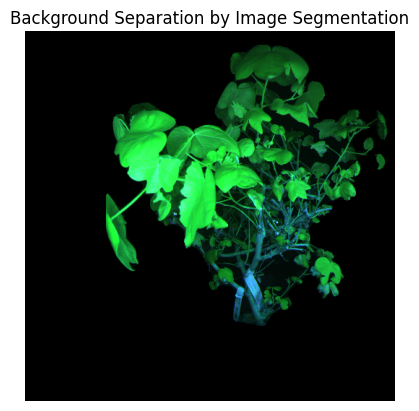

In [ ]:
plant_analysis.load_segmentation_model(path = 'yolo_segmentation_model.pt')
plant_analysis.run_segmentation()
title = 'Background Separation by Image Segmentation'
image, description = plant_analysis.plants[plant_name]['segmented_image']
display_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), title, gray = False)

## Module 3

### Identifying Phenotypic Features:
* Tips
* Branch Points
* Plant Height

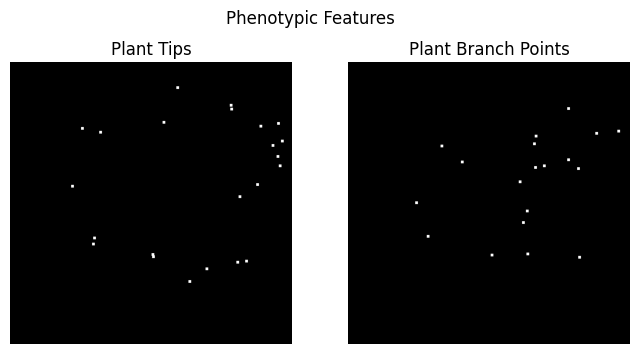


Estimated height of the plant is 42.77 cm


In [ ]:
rows = 1
columns = 2
fig = plt.figure(figsize=(8, 4))
index = 1

title = 'Phenotypic Features'

plant_analysis.calculate_tips_and_branches()
image, description = plant_analysis.plants[plant_name]['tips']
fig.add_subplot(rows, columns, index)
index += 1
cmap = 'gray'
plt.imshow(image, cmap = cmap)
plt.axis('off')
plt.title(description)

image, description = plant_analysis.plants[plant_name]['branches']
fig.add_subplot(rows, columns, index)
index += 1
cmap = 'gray'
plt.imshow(image, cmap = cmap)
plt.axis('off')
plt.title(description)

plt.suptitle(title)
plt.show()

plant_analysis.estimate_plant_height()
print('')
print('Estimated height of the plant is '+plant_analysis.get_plant_height(plant_name))

### Identifying Texture Features
* Local Binary Patterns
* Histogram of Oriented Gradients
* Scale Invariant Feature Transform

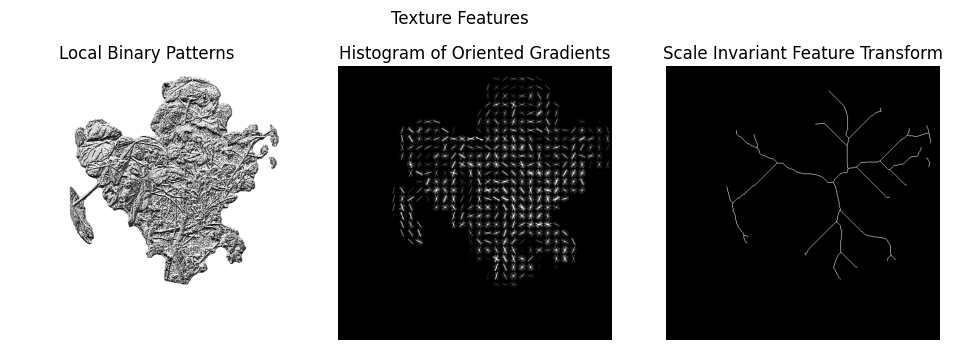

In [ ]:
rows = 1
columns = 3
fig = plt.figure(figsize=(12, 4))
index = 1

title = 'Texture Features'

plant_analysis.calculate_LBP_features()
image, description = plant_analysis.plants[plant_name]['lbp_features']
description = 'Local Binary Patterns'
fig.add_subplot(rows, columns, index)
index += 1
cmap = 'gray'
plt.imshow(image, cmap = cmap)
plt.axis('off')
plt.title(description)

plant_analysis.calculate_HOG_features()
image, description = plant_analysis.plants[plant_name]['hog_features']
description = 'Histogram of Oriented Gradients'
fig.add_subplot(rows, columns, index)
index += 1
cmap = 'gray'
plt.imshow(image, cmap = cmap)
plt.axis('off')
plt.title(description)

plant_analysis.calculate_sift_features()
image, description = plant_analysis.plants[plant_name]['sift_features']
description = 'Scale Invariant Feature Transform'
fig.add_subplot(rows, columns, index)
index += 1
cmap = 'gray'
plt.imshow(image, cmap = cmap)
plt.axis('off')
plt.title(description)

plt.suptitle(title)
plt.show()

## Module 4

The following command launches our interactive GUI which combines all the above mentioned modules    
Check out the [documentation](https://plant-analysis-avll.readthedocs.io/en/latest/) for [user guide](https://plant-analysis-avll.readthedocs.io/en/latest/usage/)

In [ ]:
plant_analysis_AVLL.launch_GUI(model_path = 'yolo_segmentation_model.pt', share_option = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8f059351effe1dddc5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Survey

Please do share your feedback to us by filling this [Survey](https://forms.gle/zEMLY1U2Pf4gX4Cm8)